# Part 1: Linear Regression

Let's get an intuition of the linear regression process

[Click here for external link](https://developers.google.com/machine-learning/crash-course/linear-regression/parameters-exercise)

## Description
- A statistical / machine learning model for regression.
- Model the relationship between a dependent variable and one or more independent variables.

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \epsilon $$

| Variable | Description |
|----------|-------------|
| $ Y $ | Dependent variable |
| $ X_1, X_2, \ldots, X_n $ | Independent variables |
| $ \beta_0, \beta_1, \beta_2, \ldots, \beta_n $ | Coefficients |
| $ \epsilon $ | Error term |

  ![linear_reg](../assets/linear_reg.jpeg)
 
## Assumptions: 
  - Linear relationship between dependent and independent variables
  - No multicollinearity among independent variables
  - Homoscedasticity: Constant variance of errors
  - Normal distribution of errors

## Training / Fitting the Model

### Cost function

**Definition**: A measure of how far off our predictions are from the actual values.

**Mean Squared Error (MSE)**: 

$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
  
| Variable | Description |
|---|---|
| $y_i$ | Actual value |
| $ \hat{y_i} $ | Predicted value: 
  $ n $ | Number of observations |

**Objective**

The goal is to find the values of the coefficients that minimize the sum of the squared differences between the observed values and the values predicted by the linear equation.
  - **Ordinary Least Squares (OLS)**: OLS is the most common method used in linear regression to estimate the coefficients. Often involves solving a set of linear equations or using optimization algorithms.
  - **Gradient Descent**: An optimization algorithm used to minimize the cost function by iteratively moving towards the minimum.

## Evaluating the Model

### R-Squared (R²) in Linear Regression

R-squared, often denoted as R², is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model.

#### Definition and Formula

R² is defined as the ratio of the variance explained by the model to the total variance. It is calculated as:

$$ R^2 = 1 - \frac{\text{Sum of Squares of Residuals (SSR)}}{\text{Total Sum of Squares (SST)}} $$

where,
- SSR (Sum of Squares of Residuals) is the sum of the squares of the model residuals.
- SST (Total Sum of Squares) is the total sum of the squares of the difference from the mean.

#### Interpretation

- **Value Range**: R² ranges from 0 to 1.
- **Higher R²**: A higher R² indicates a better fit of the model. An R² of 1 means that the regression predictions perfectly fit the data.
- **Limitation**: While a high R² indicates a good fit, it doesn’t guarantee that the model is appropriate. Overfitting, where the model is too complex, can lead to misleadingly high R² values.

![sst_ssr](../assets/sst_ssr.png)

### Sum of Squares in Linear Regression

Sum of Squares is a measure used in statistical analysis to quantify variations in data points.

#### 1. Total Sum of Squares (SST)

SST measures the total variation in the dependent variable. It is calculated as:

$$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

where $ y_i $ is the actual value, $ \bar{y} $ is the mean of the dependent variable, and $ n $ is the number of observations.

#### 2. Sum of Squares of Residuals (SSR)

SSR, also known as the sum of squared errors of the model, measures the unexplained variation by the model. It is calculated as:

$$ \text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $ \hat{y}_i $ is the predicted value.

#### Importance in Regression Analysis

- **SST**: Reflects the total variation in the data.
- **SSR**: Indicates the amount of variation not explained by the model.
- **Balance**: A good model minimizes SSR and explains most of the SST.

Sum of Squares helps in understanding the effectiveness of the regression model in explaining the variance of the data. The lower the SSR in comparison to SST, the better the model's predictive capabilities.

## Hands-On: Scikit-Learn Tutorial

**Activity**: Implement linear regression in Python using the Scikit-Learn (`sklearn`) library.

**Mode**: Class Walkthrough

**⚡ Task**
1. Create synthetic data using NumPy.
2. Split the data into training and testing sets.
3. Evaluate the model's performance.
4. Visualize the results.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Let's create a synthetic dataset using NumPy.

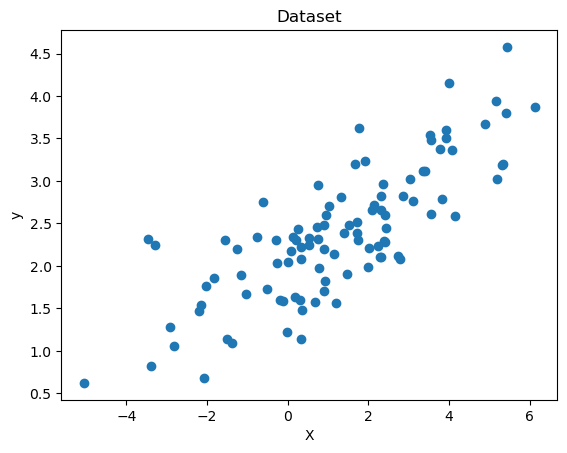

In [15]:
# Array of 100 values with mean = 1.5, stddev = 2.5

np.random.seed(42)
X = 2.5 * np.random.randn(100) + 1.5
res = 0.5 * np.random.randn(100)
y = 2 + 0.3 * X + res

# Convert X and y into a pandas DataFrame

df = pd.DataFrame({
    'X': X,
    'y': y
})

plt.scatter(df['X'], df['y'])
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Before we train (fit) the model, we'll need to split the dataset into `training` and `testing` sets. The split is an `80:20` (which can be arbitrary).

The reason for splitting the dataset is to avoid overfitting. Overfitting occurs when the model learns the training data too well, including the noise, and is unable to generalize to new  / unseen data. We will fit the model on the training set and evaluate it on the testing set (unseen data).

In [16]:
# Split data 80-20 and reshape inputs for scikit-learn compatibility.

X_train, X_test, y_train, y_test = train_test_split(
                                   df['X'], 
                                   df['y'], 
                                   test_size=0.2,
                                   random_state=0)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

print("Train shape:", X_train.shape)
print("Test shape : ", X_test.shape)

Train shape: (80, 1)
Test shape :  (20, 1)


Now, let's train (fit) the model.

In [17]:
# Train (fit) the model using the training data

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to quantify prediction accurary (lower is better)
# Calculate R-squared (R2) to measure how well the independent variables explain the variance (closer to 1 is better)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score         :", r2)

Mean Squared Error: 0.19400358838812312
R^2 Score         : 0.6829179889395931


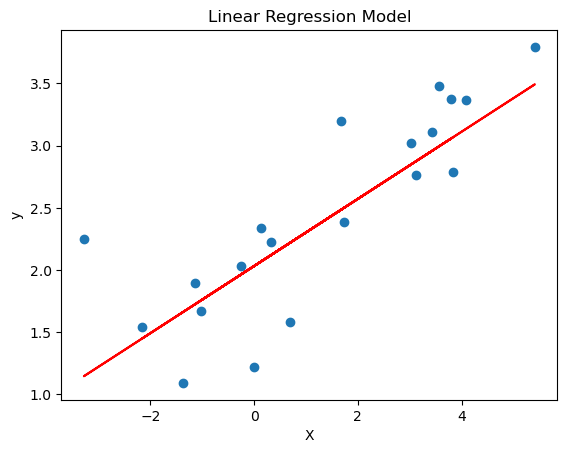

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Self-Study: Statsmodels Tutorial

**Activity**: Implement linear regression in Python using the (`statsmodels`) library.

**Mode**: Self-Study

**⚡ Task**
1. Preapare predictor and response variables for linear regression.
2. Implement linear regression using `statsmodels`.
3. Evaluate the model's performance.
4. Compare with `scikit-learn` linear regression.


In [20]:
import statsmodels.api as sm

X = df['X']
y = df['y']

# Manually add a constant term (intercept) to X, as statsmodels does not add it by default
X = sm.add_constant(X)

# Split the data into training and testing sets (80% train, 20% test)
# Create and fit the Ordinary Least Squares (OLS) regression model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = sm.OLS(y_train, X_train).fit()

Statsmodels provides extensive statistical diagnostics and tests about the model, such as _p-values, confidence intervals, and in-depth analysis of residuals._

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     124.3
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           8.28e-18
Time:                        19:30:57   Log-Likelihood:                -54.374
No. Observations:                  80   AIC:                             112.7
Df Residuals:                      78   BIC:                             117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0323      0.062     32.914      0.000       1.909       2.155
X              0.2700      0.024     11.147      0.000       0.222       0.318
==============================================================================
Omnibus:                        2.394   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                2.339
Skew:                           0.403   Prob(JB):                        0.310
Kurtosis:                       2.769   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate prediction accuracy
# Calculate R-squared (R2) to measure goodness of fit

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.1940035883881232
R^2 Score: 0.682917988939593


The results are the same as sklearn's model above.

### Exercise

Now, use the statsmodels library to perform linear regression on the "diamonds" dataset, which contains the prices and attributes of almost 54,000 diamonds. We'll try to predict the price of a diamond based on its carat weight.

In [23]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
X = diamonds['carat']   # Feature
y = diamonds['price']   # Target

X = sm.add_constant(X)

# Split the dataset into training (70%) and testing (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.117e+05
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:30:57   Log-Likelihood:            -3.3100e+05
No. Observations:               37758   AIC:                         6.620e+05
Df Residuals:                   37756   BIC:                         6.620e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2247.7045     15.629   -143.812      0.000   -2278.339   -2217.070
carat       7741.3790     16.827    460.059      0.000    7708.398    7774.360
==============================================================================
Omnibus:                     9735.449   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112199.524
Skew:                           0.912   Prob(JB):                         0.00
Kurtosis:                      11.246   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y_pred = model.predict(X_test)

# Calculate R2 Score (Coefficient of Determination) to evaluate how well the model explains the variance in the data
# Calculate Mean Squared Error (MSE) to measure the average squared difference between estimated values and the actual value

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2372901.2792871664
R^2 Score: 0.8509771156910653


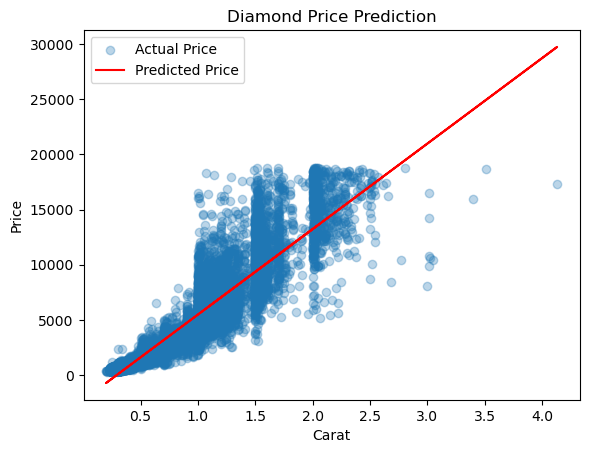

In [26]:
plt.scatter(X_test['carat'], y_test, alpha=0.3, label='Actual Price')
plt.plot(X_test['carat'], y_pred, color='red', label='Predicted Price')
plt.title('Diamond Price Prediction')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()